In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.getcwd() 
# os.cd('C:\\Users\\lenovo\\')

'C:\\Users\\lenovo'

In [2]:
df = pd.read_csv('diabetes.data',
                 sep='\s+',
                 header=0)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


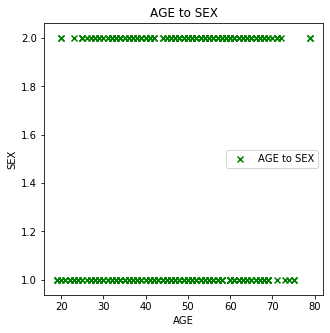

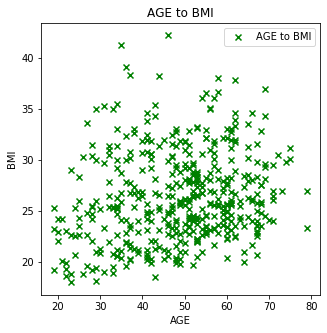

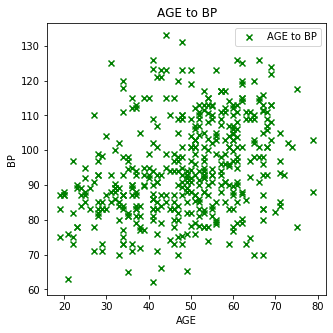

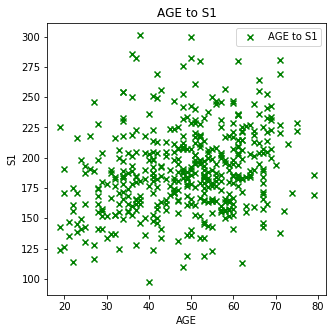

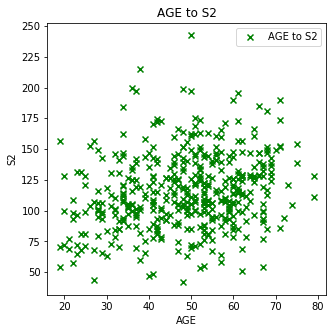

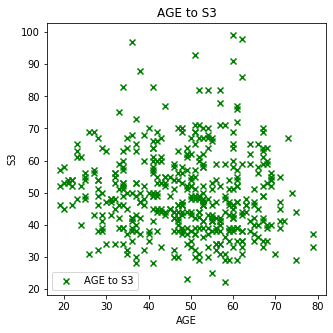

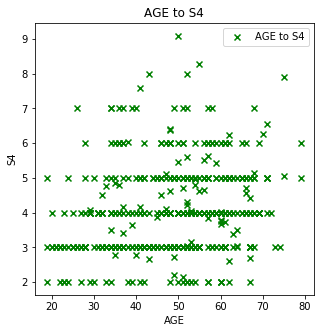

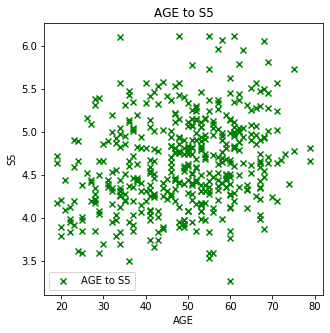

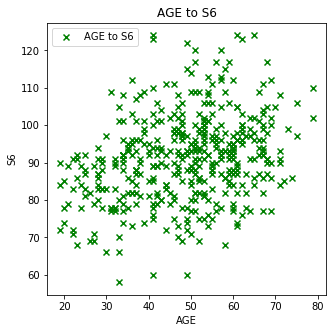

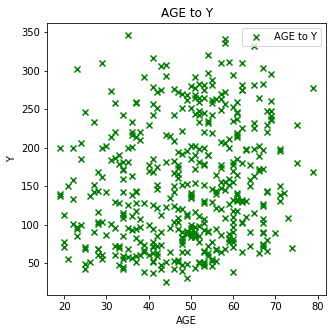

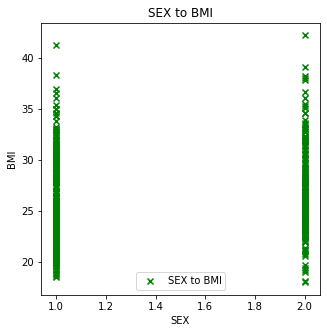

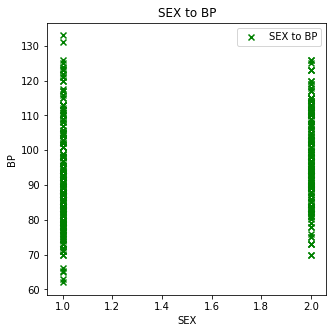

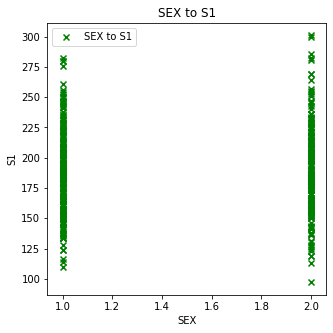

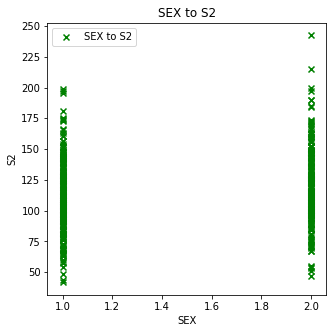

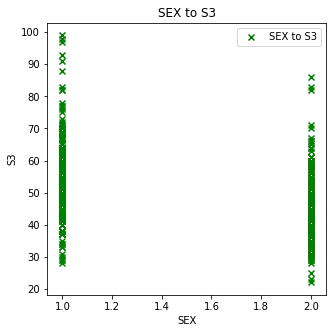

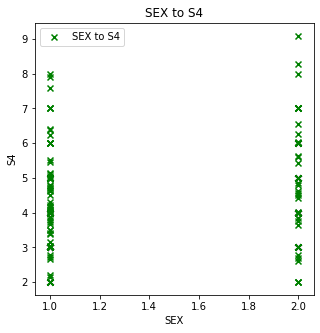

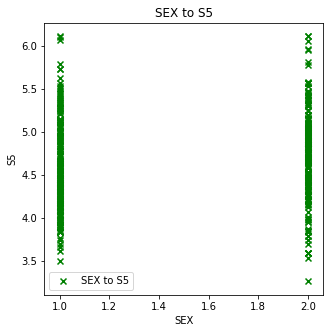

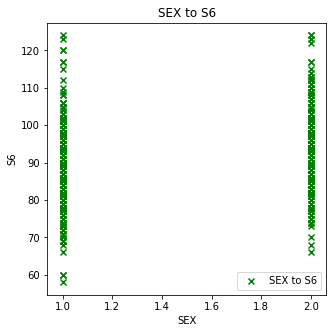

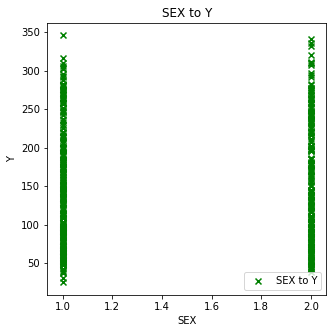

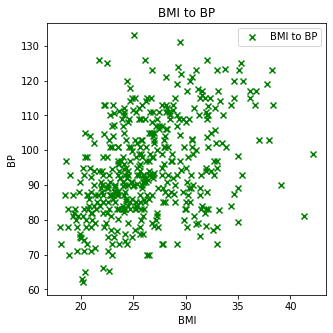

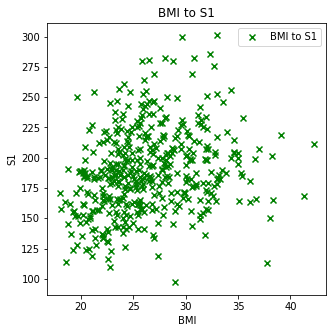

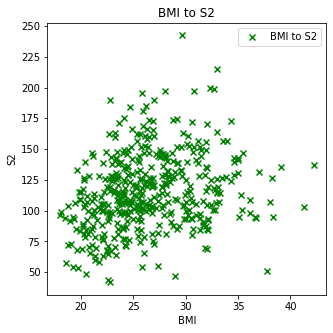

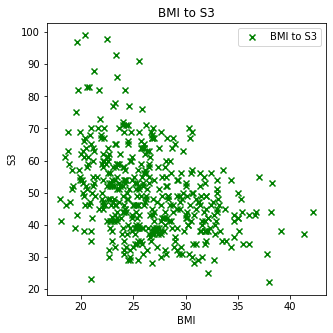

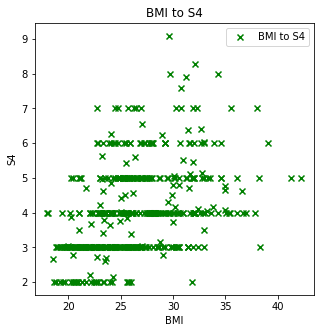

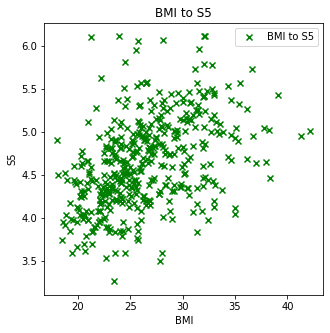

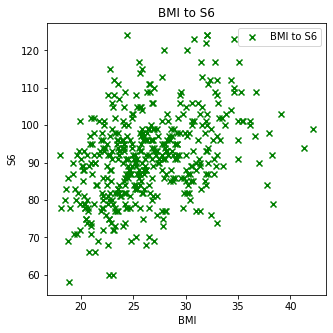

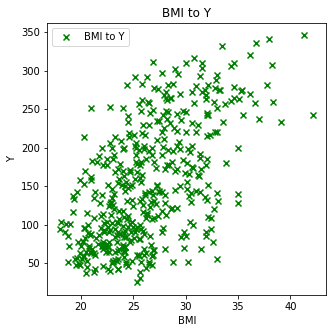

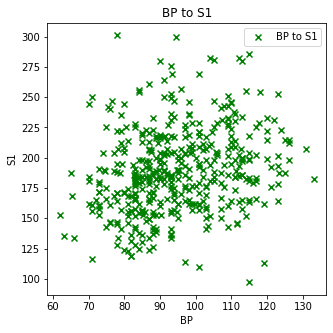

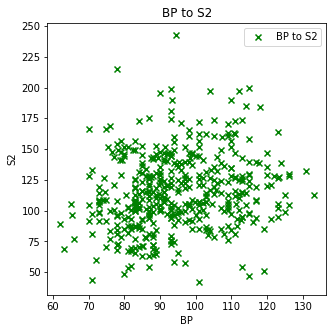

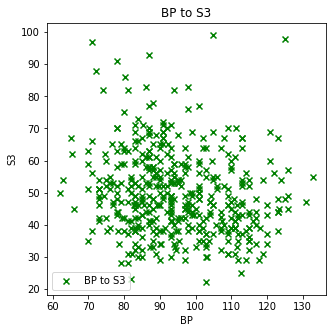

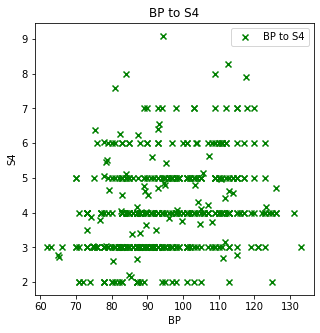

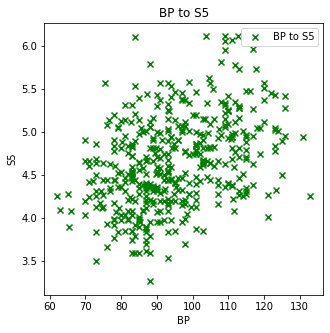

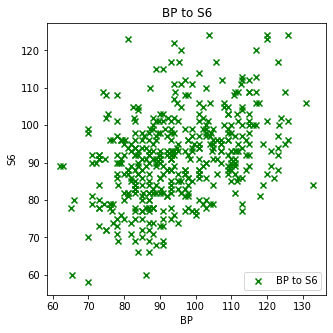

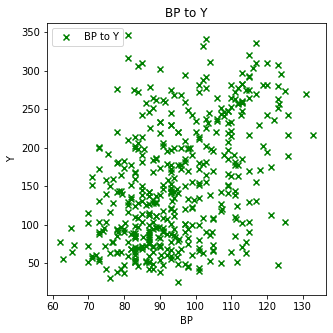

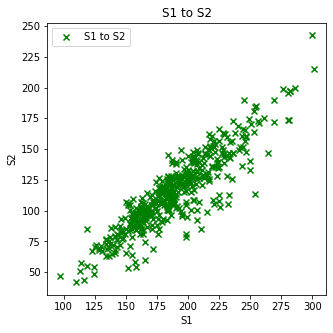

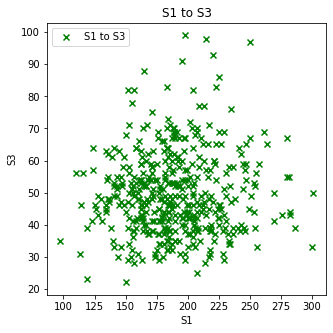

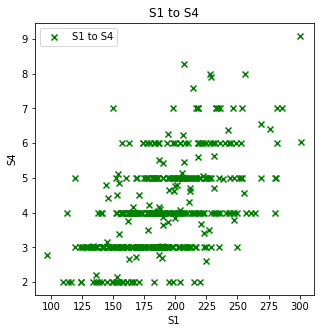

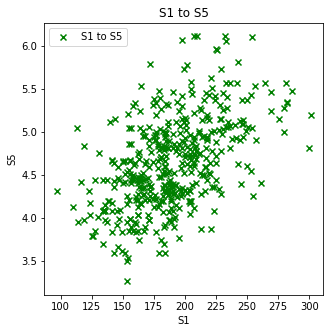

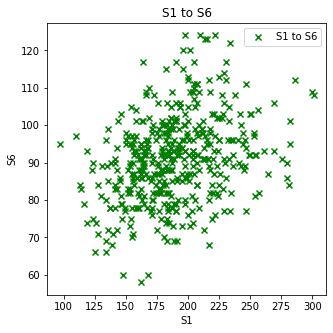

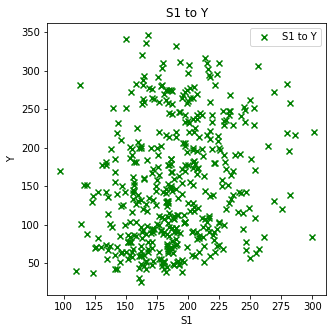

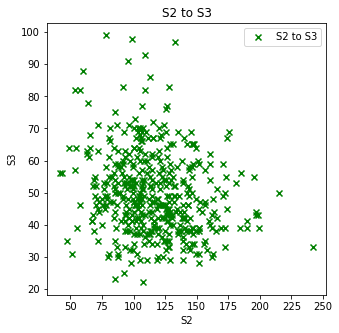

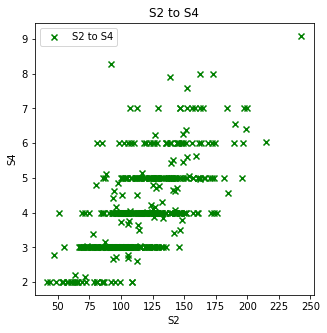

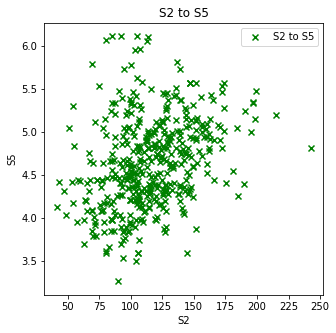

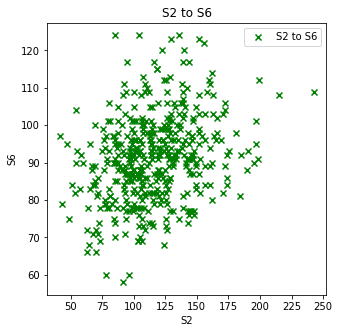

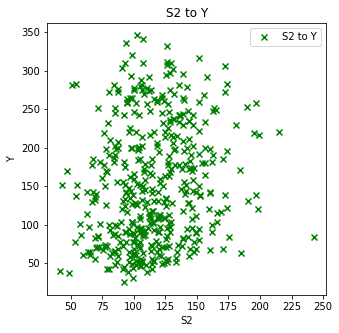

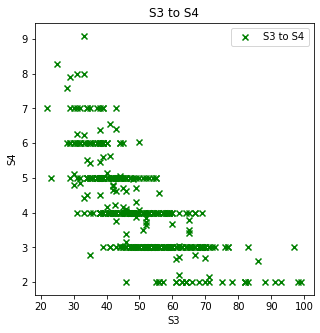

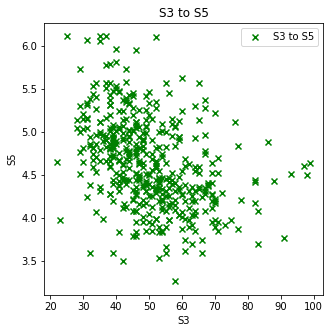

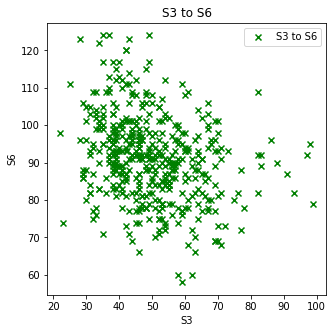

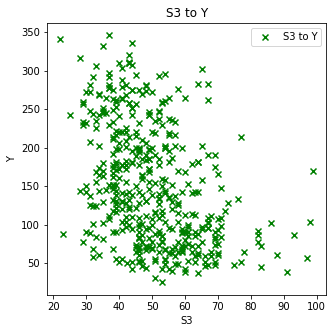

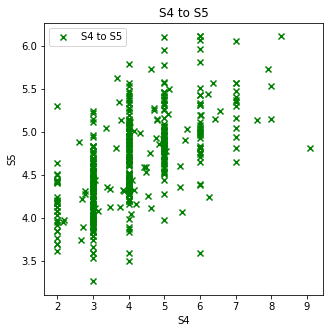

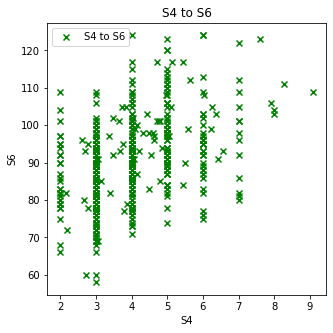

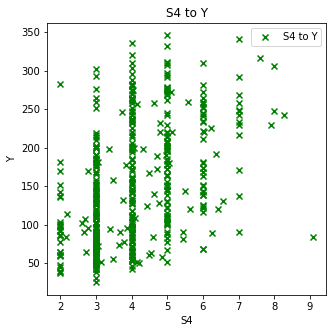

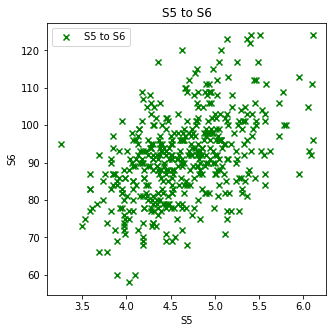

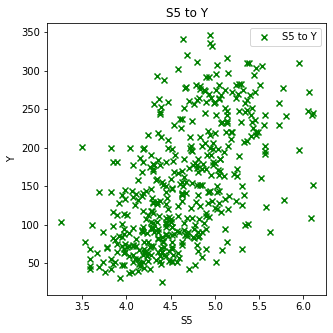

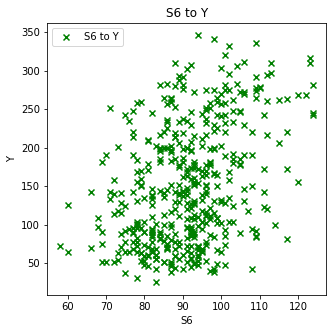

In [3]:
#Basic
# GENRATING A TOTAL DATA 
os.makedirs('plots/7-matplotlib_dataset_exploration', exist_ok=True)

for col1_idx, column1 in enumerate(df.columns):
    for col2_idx, column2 in enumerate(df.columns):
        if col1_idx < col2_idx:
            fig, axes = plt.subplots(1, 1, figsize=(5, 5))
            axes.scatter(df[column1], df[column2], label=f'{column1} to {column2}', color='green', marker='x')
            axes.set_title(f'{column1} to {column2}')
            axes.set_xlabel(column1)
            axes.set_ylabel(column2)
            axes.legend()
            plt.savefig(f'plots/7-matplotlib_dataset_exploration/diabetes_{column1}_{column2}_scatter.png', dpi=300)
#            plt.close(fig)


     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
5     23    1  22.6   89.00  139   64.8  61.0  2.00  4.1897   68   97
9     29    1  30.0   85.00  180   93.4  43.0  4.00  5.3845   88  310
10    22    1  18.6   97.00  114   57.6  46.0  2.00  3.9512   83  101
12    53    1  23.7   92.00  186  109.2  62.0  3.00  4.3041   81  179
14    61    1  24.0   91.00  202  115.4  72.0  3.00  4.2905   73  118
16    47    1  30.3  109.00  207  100.2  70.0  3.00  5.2149   98  166
18    38    1  25.4   84.00  162  103.0  42.0  4.00  4.4427   87   97
19    41    1  24.7   83.00  187  108.2  60.0  3.00  4.5433   78  168
20    35    1  21.1   82.00  156   87.8  50.0  3.00  4.5109   95   68
22    25    1  26.0   92.00  187  120.4  56.0  3.00  3.9703   88   68
24    31    1  29.7 

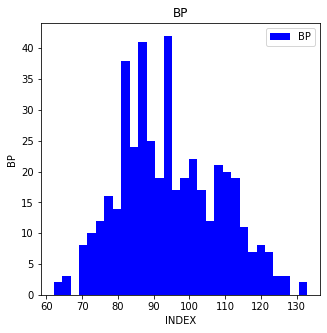

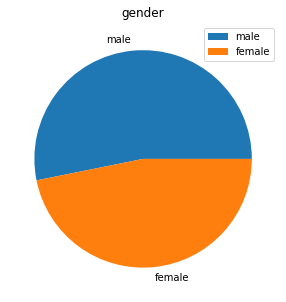

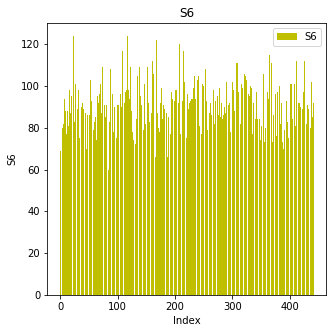

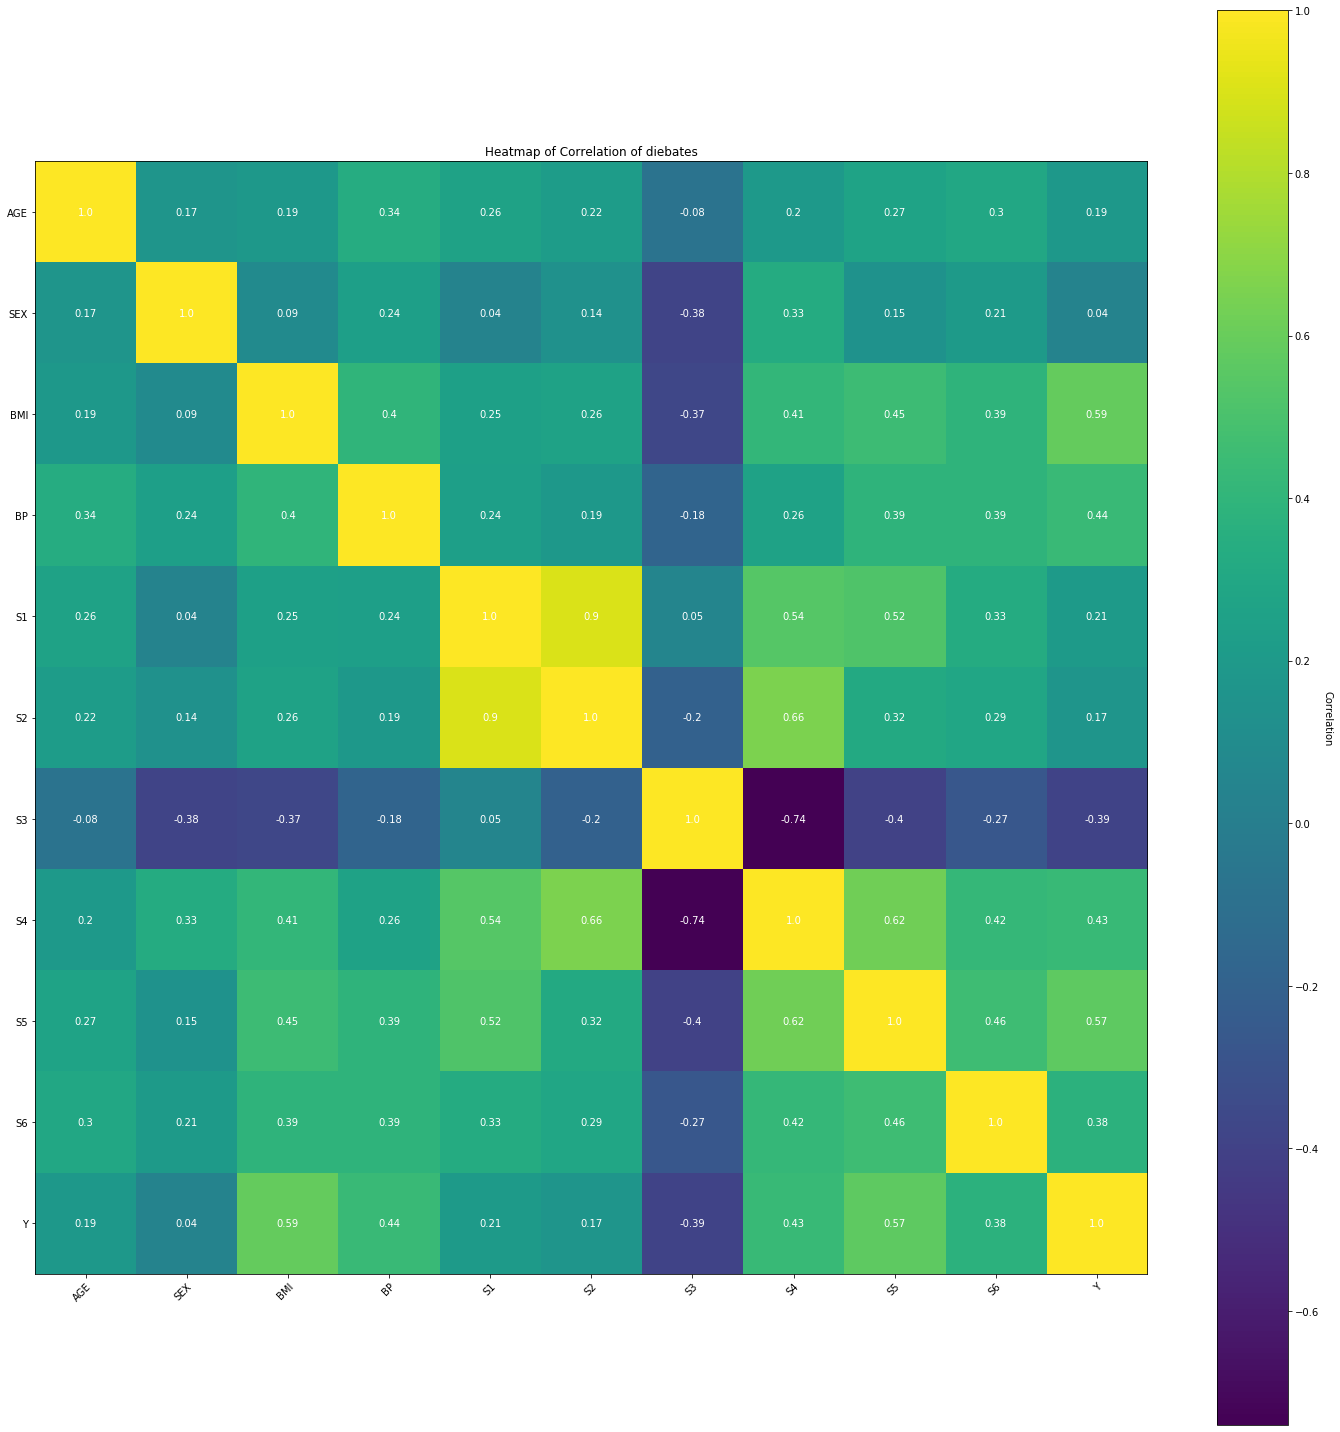

In [6]:


from mpl_toolkits.mplot3d import Axes3D
os.makedirs('plots/9-matplotlib_other_plots', exist_ok=True)

# Histogram
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.hist(df['BP'], bins=30, color='b', label='BP')
axes.set_title('BP')
axes.set_xlabel('INDEX')
axes.set_ylabel('BP')
axes.legend()
plt.savefig('plots/9-matplotlib_other_plots/cancer_mean_simmetry_hist.png', dpi=300)

# Pie
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
labels = 'male','female'
axes.pie(df['SEX'].value_counts(), labels=labels)
axes.set_title('gender')
axes.legend()
plt.savefig('plots/9-matplotlib_other_plots/cancer_diagnosis_pie.png', dpi=300)

# Bar
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.bar(np.arange(0, len(df['S6'])), df['S6'], color='y', label='S6')
axes.set_title('S6')
axes.set_xlabel('Index')
axes.set_ylabel('S6')
axes.legend()
plt.savefig('plots/9-matplotlib_other_plots/cancer_mean_simmetry_bar.png', dpi=300)

# Correlation Heatmap
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

correlation = df.corr().round(2)
im = axes.imshow(correlation)
cbar = axes.figure.colorbar(im, ax=axes)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")
numrows = len(correlation.iloc[0])
numcolumns = len(correlation.columns)
axes.set_xticks(np.arange(numrows))
axes.set_yticks(np.arange(numcolumns))
axes.set_xticklabels(correlation.columns)
axes.set_yticklabels(correlation.columns)
plt.setp(axes.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
for i in range(numrows):
    for j in range(numcolumns):
        text = axes.text(j, i, correlation.iloc[i, j], ha='center', va='center', color='w')
axes.set_title('Heatmap of Correlation of diebates')
fig.tight_layout()
plt.savefig('plots/9-matplotlib_other_plots/cancer_correlation_heatmap.png')

# 3D
malign = df[df['SEX'] == 1]
print(malign)
benign = df[df['SEX'] == 2]
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, projection='3d')
line1 = axes.scatter(malign['S2'], malign['S3'], malign['S4'])
line2 = axes.scatter(benign['S2'], benign['S3'], benign['S4'])
axes.legend((line1, line2), ('MALE', 'FEMALE'))
axes.set_xlabel('S2')
axes.set_ylabel('S3')
axes.set_zlabel('S4')
plt.savefig('plots/9-matplotlib_other_plots/cancer_diagnosis_scatter_3d.png')

plt.close()